In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [29]:
df.shape

(3554, 18)

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.33,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.91,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9285.71,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.86,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.73,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115


In [31]:
latlong = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\latlong.csv")
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [32]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [33]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [34]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [35]:
new_df = df.merge(latlong, on='sector')

In [36]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [38]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()


In [40]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.794444,3056.166667,28.4484,77.0210
manesar,0.962258,4608.077097,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.791667,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.806449,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.789524,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.954000,6001.719900,1576.541800,28.4079,76.9153
sector 93,0.848889,8009.953333,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.465636,995.981818,28.4172,76.9081


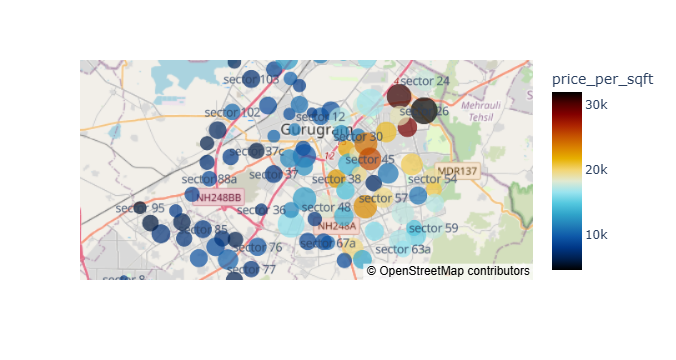

In [41]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [42]:
new_df.to_csv('data_viz1.csv',index=False)

In [43]:
df1 = pd.read_csv('gurgaon_properties.csv')


In [44]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Dayanand Colony,flat,ss residency,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,"1418, Dayanand Colony, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Dental Health Centre', 'No...","Prime location, 400 mtrs from main railway roa...",[],"['Security / Fire Alarm', 'False Ceiling Light...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
1,3 BHK Flat in Sector 103 Gurgaon,flat,ansal housing highland park,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,not available,"Tower 1, Sector 103 Gurgaon, Gurgaon, Haryana",7.0,North-East,0 to 1 Year Old,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K...",This 3 bhk flat is located in ansal housing hi...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,1 BHK Flat in Sector 83 Gurgaon,flat,sapphire eighty three,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,not available,"Sector 83, Sector 83 Gurgaon, Gurgaon, Haryana",6.0,NaN,undefined,"['S.R.S. Hospital and Critical Care Unit', 'Or...",1bhk multistorey apartment for resale in sapph...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment5 out of 5', 'Safety5 out of 5', ..."
3,3 BHK Flat in Sector 33 Gurgaon,flat,unitech the residences,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,servant room,"701, Sector 33 Gurgaon, Gurgaon, Haryana",8.0,North-East,5 to 10 Year Old,"['Huda Metro Station', 'Raheja Mall', 'Delhi G...",This 3 bhk apartment is available for sale in ...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of..."
4,4 BHK Flat in Sector 113 Gurgaon,flat,m3m capital,3.25,14142.0,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,"pooja room,study room,servant room","Sector 113 Gurgaon , Gurgaon, Haryana",34.0,NaN,Dec 2025,"['Phase 2 Metro Station', 'Global Foyer Mall',...",Check out this 4 bhk apartment for sale in m3m...,"['4 AC', '1 Chimney', '1 Modular Kitchen', 'No...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN


In [46]:
df1 = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\gurgaon_properties.csv")
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Dayanand Colony,flat,ss residency,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,"1418, Dayanand Colony, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Dental Health Centre', 'No...","Prime location, 400 mtrs from main railway roa...",[],"['Security / Fire Alarm', 'False Ceiling Light...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
1,3 BHK Flat in Sector 103 Gurgaon,flat,ansal housing highland park,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,not available,"Tower 1, Sector 103 Gurgaon, Gurgaon, Haryana",7.0,North-East,0 to 1 Year Old,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K...",This 3 bhk flat is located in ansal housing hi...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,1 BHK Flat in Sector 83 Gurgaon,flat,sapphire eighty three,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,not available,"Sector 83, Sector 83 Gurgaon, Gurgaon, Haryana",6.0,NaN,undefined,"['S.R.S. Hospital and Critical Care Unit', 'Or...",1bhk multistorey apartment for resale in sapph...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment5 out of 5', 'Safety5 out of 5', ..."
3,3 BHK Flat in Sector 33 Gurgaon,flat,unitech the residences,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,servant room,"701, Sector 33 Gurgaon, Gurgaon, Haryana",8.0,North-East,5 to 10 Year Old,"['Huda Metro Station', 'Raheja Mall', 'Delhi G...",This 3 bhk apartment is available for sale in ...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of..."
4,4 BHK Flat in Sector 113 Gurgaon,flat,m3m capital,3.25,14142.0,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,"pooja room,study room,servant room","Sector 113 Gurgaon , Gurgaon, Haryana",34.0,NaN,Dec 2025,"['Phase 2 Metro Station', 'Global Foyer Mall',...",Check out this 4 bhk apartment for sale in m3m...,"['4 AC', '1 Chimney', '1 Modular Kitchen', 'No...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN


In [47]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [48]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'False Ceiling Light...",sector 6
1,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 103
2,NaN,sector 83
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 33
4,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 113


In [49]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [50]:
main

['Security / Fire Alarm',
 'False Ceiling Lighting',
 'Water Storage',
 'No open drainage around',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Spacious Interiors',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Centrally Air Conditioned',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Shopping Cent

In [51]:
from wordcloud import WordCloud

In [52]:
feature_text = ' '.join(main)

In [53]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [54]:
feature_text

'Security / Fire Alarm False Ceiling Lighting Water Storage No open drainage around Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Separate entry for servant room Visitor Parking Swimming Pool Park Shopping Centre Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Water softening plant Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Centrally Air Conditioned Maintenance Staff Water Storage Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Shopping Centre Fitness Centre / GYM Waste Disposal Club house / Community Center Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Park Visitor Park

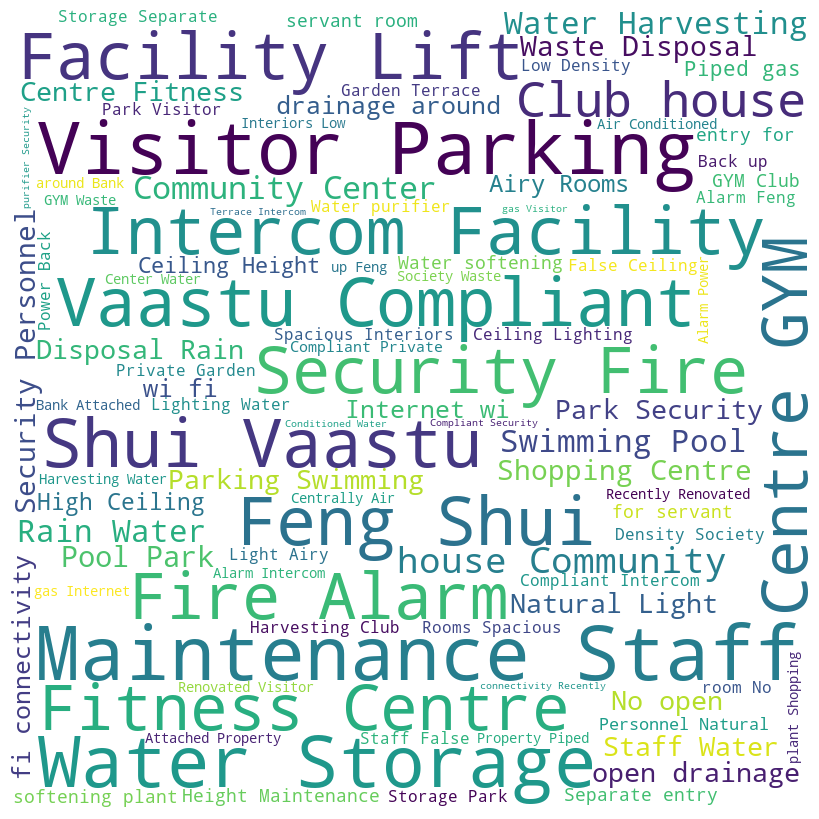

In [55]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

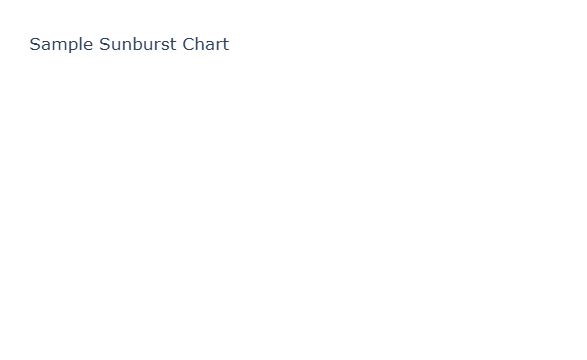

In [56]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

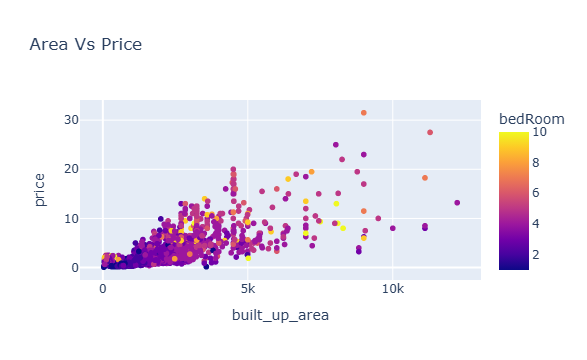

In [57]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

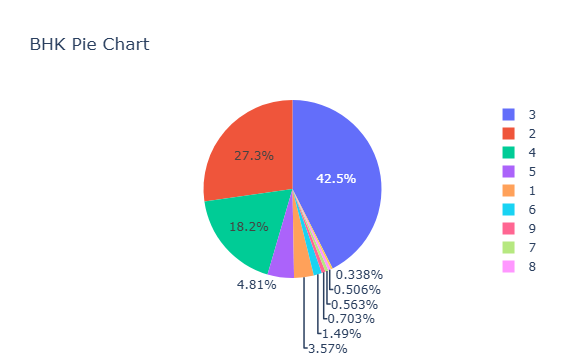

In [59]:
fig = px.pie(df, names='bedRoom', title='BHK Pie Chart')

# Show the plot
fig.show()


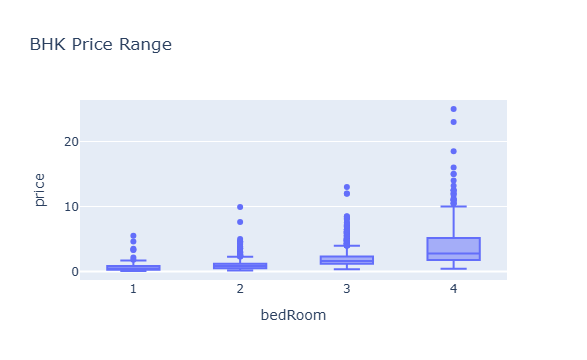

In [60]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6564\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Dell\AppData\Local\Temp\ipykernel_6564\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

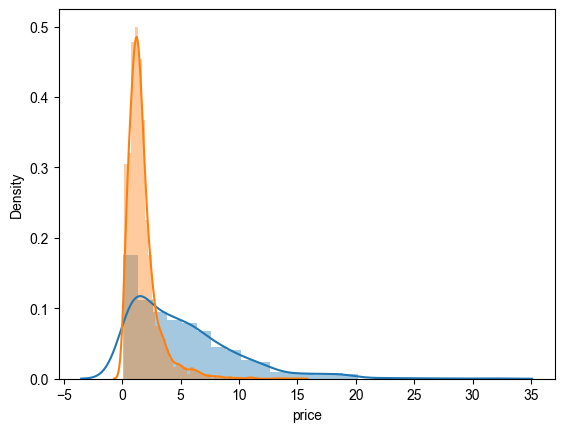

In [61]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])